Mean Squared Error: 4490381821.015227
   PERIODO  POB_URBANA  QRESIDUOS_MUN_PRED
0     2022     1000000       335278.085000
1     2023     1020000       335278.085000
2     2024     1040000       334438.903333
3     2025     1060000       312579.266667


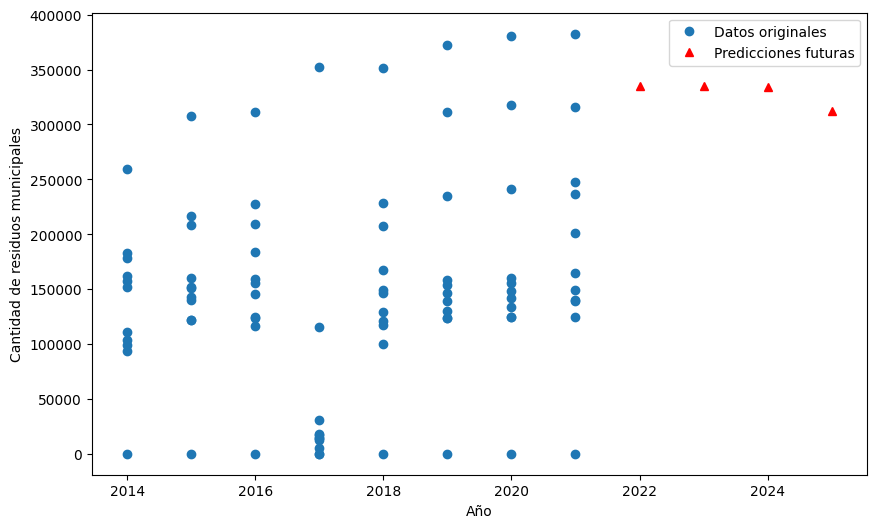

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/home/data/datos_procesados.csv'
df = pd.read_csv(file_path, delimiter=',')

# Seleccionar las características y la variable objetivo
X = df[['PERIODO', 'POB_URBANA']]
y = df['QRESIDUOS_MUN']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Búsqueda del mejor número de vecinos
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo kNN
best_knn = grid_search.best_estimator_

# Evaluar el modelo
y_pred = best_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Predicción para los siguientes años
future_years = pd.DataFrame({
    'PERIODO': [2022, 2023, 2024, 2025],
    'POB_URBANA': [1000000, 1020000, 1040000, 1060000]  # Ejemplo de población urbana proyectada
})
future_years_scaled = scaler.transform(future_years)
future_predictions = best_knn.predict(future_years_scaled)
future_years['QRESIDUOS_MUN_PRED'] = future_predictions

print(future_years)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.plot(df['PERIODO'], df['QRESIDUOS_MUN'], 'o', label='Datos originales')
plt.plot(future_years['PERIODO'], future_years['QRESIDUOS_MUN_PRED'], 'r^', label='Predicciones futuras')
plt.xlabel('Año')
plt.ylabel('Cantidad de residuos municipales')
plt.legend()
plt.show()